In [20]:
using DifferentialEquations

p = (0.230605, 0.0443577)
N = 10e6
C = 172
f = function (du, u, p, t) # Define f as an in-place update into du
    N = u[1]+u[2]+u[3]
    b, g = p
    du[1] = -b*u[1]*u[2]/N
    du[2] = b*u[1]*u[2]/N - g*u[2]
    du[3] = g*u[2]
end

#9 (generic function with 1 method)

In [21]:
u0 = [N-C; C; 0.0]; tspan = (0.0, 50.0)
prob = ODEProblem(f, u0, tspan, p);
# Solve the problem
sol = solve(prob);

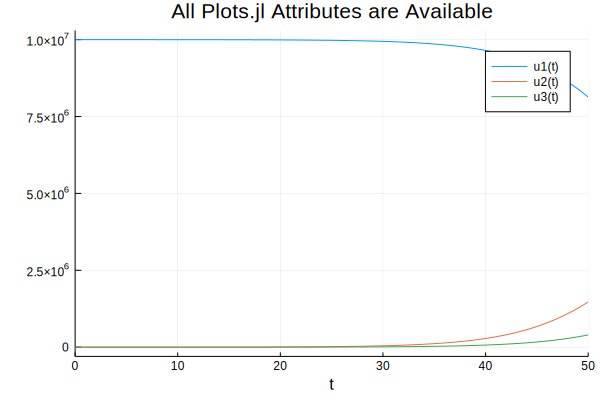

In [22]:
using Plots; gr() # Using the Plotly Backend
plot(sol,title="All Plots.jl Attributes are Available")

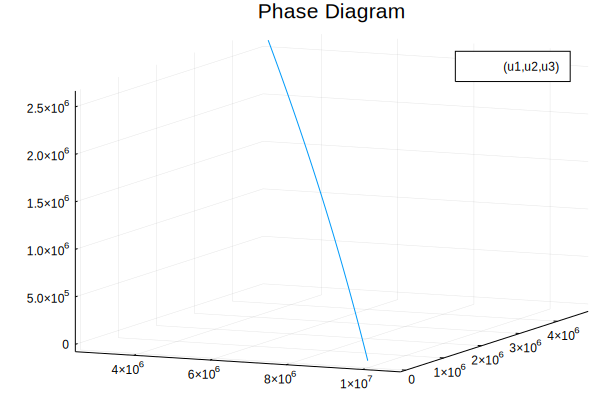

In [4]:
plot(sol,title="Phase Diagram",vars=(1,2,3))

In [5]:
using ParameterizedFunctions, OrdinaryDiffEq, DiffEqParamEstim, LinearAlgebra
using BlackBoxOptim, NLopt, Plots, RecursiveArrayTools #, QuadDIRECT

f = function (du, u, p, t) # Define f as an in-place update into du
    N = u[1]+u[2]+u[3]
    b, g = p
    du[1] = -b*u[1]*u[2]/N
    du[2] = b*u[1]*u[2]/N - g*u[2]
    du[3] = g*u[2]
end

u0 = [N-C; C; 0.0];  tspan = (0.0, 30)
p = [.1, .06]
prob = ODEProblem(f, u0, tspan, p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 30.0)
u0: [9.999828e6, 172.0, 0.0]

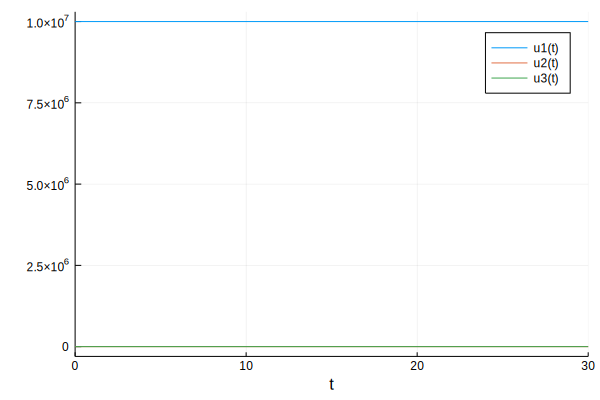

In [6]:
dt = 30.0/3000
tf = 30.0
tinterval = 0:dt:tf
t  = collect(tinterval)

data_sol = solve(prob,Tsit5(),saveat=t,reltol=1e-9,abstol=1e-9)
data = convert(Array, data_sol)
p2 = plot(data_sol)

In [11]:
loc_bounds = Tuple{Float64, Float64}[(0, 5), (0, 5),]
glo_bounds = Tuple{Float64, Float64}[(0, 10), (0, 10),]
loc_init = [1,0.5]
glo_init = [5,5]

obj = build_loss_objective(prob,Tsit5(),L2Loss(t,data),tstops=t)
res1 = bboptimize(obj;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 331 evals, 248 steps, improv/step: 0.391 (last = 0.3911), fitness=821755650.435697913
1.00 secs, 670 evals, 575 steps, improv/step: 0.290 (last = 0.2141), fitness=821755650.435697913
1.51 secs, 989 evals, 894 steps, improv/step: 0.255 (last = 0.1912), fitness=153792880.488650054
2.01 secs, 1302 evals, 1207 steps, improv/step: 0.251 (last = 0.2396), fitness=42137471.520751432
2.51 secs, 1616 evals, 1521 steps, improv/step: 0.231 (last = 0.1561), fitness=15417022.142030802
3.01 secs, 1955 evals, 1860 steps, improv/step: 0.220 (last = 0.1711), fitness=15417022.142030802
3.51 secs, 2266 evals, 2172 steps, improv/step: 0.222 (last = 0.2340), fitness=59913.767408773
4.01 secs, 2599 evals, 2506 steps, improv/step: 0.222 (last = 0.2216), fitness=59913.767408773
4.51 secs, 2936 evals, 2

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.584830573444e9, 10.865999937057495, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 444177,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7092, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(7.263435731610941e-6, [0.09999999239911987, 0.059999991210741496]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([0.09999999262923362 0.09999999235300283 … 0.10000000037393446 0.09999999402629191; 0.05999998891366075

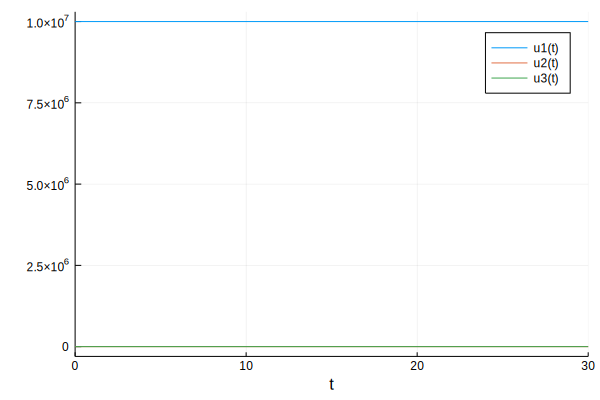

In [7]:
dt = 30.0/3000
tf = 30.0
tinterval = 0:dt:tf
t  = collect(tinterval)

data_sol = solve(prob,Tsit5(),saveat=t,reltol=1e-9,abstol=1e-9)
data = convert(Array, data_sol)
p2 = plot(data_sol)

In [8]:
loc_bounds = Tuple{Float64, Float64}[(0, 5), (0, 5),]
glo_bounds = Tuple{Float64, Float64}[(0, 10), (0, 10),]
loc_init = [1,0.5]
glo_init = [5,5]

obj = build_loss_objective(prob,Tsit5(),L2Loss(t,data),tstops=t)
res1 = bboptimize(obj;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 302 evals, 224 steps, improv/step: 0.375 (last = 0.3750), fitness=765828164.746145725
1.00 secs, 611 evals, 519 steps, improv/step: 0.283 (last = 0.2136), fitness=750529930.378921747
1.50 secs, 920 evals, 817 steps, improv/step: 0.251 (last = 0.1946), fitness=584274640.364822030
2.02 secs, 1249 evals, 1146 steps, improv/step: 0.252 (last = 0.2553), fitness=177467230.108324885
2.53 secs, 1562 evals, 1459 steps, improv/step: 0.247 (last = 0.2300), fitness=14270252.160192467
3.04 secs, 1875 evals, 1772 steps, improv/step: 0.244 (last = 0.2268), fitness=4607378.645431555
3.55 secs, 2185 evals, 2082 steps, improv/step: 0.246 (last = 0.2613), fitness=258473.685321043
4.05 secs, 2500 evals, 2397 steps, improv/step: 0.241 (last = 0.2032), fitness=108813.511865169
4.55 secs, 2793 evals,

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.584823601469e9, 11.629999876022339, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 663740,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7103, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(3.78201336577892e-8, [0.09999999990717583, 0.059999999547438385]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([0.09999999895977238 0.09999999720180028 … 0.09999999981583856 0.09999999999170012; 0.05999999812112712 

In [12]:
c = [
    172,
    240,
    258,
    403,
    531,
    615,
    984,
    1254,
    1520,
    1820,
    2251,
    2612,
    3420,
    4189,
    5469,
    5791,
    7280,
    8725,
    9820,
    11685,
    13272,
    14649,
    16220,
    17713,
    19884,
    22264,
    25515
];

In [13]:
d = [
    6,
    9,
    9,
    14,
    17,
    23,
    24,
    38,
    55,
    73,
    98,
    135,
    154,
    267,
    333,
    468,
    617,
    744,
    890,
    966,
    1218,
    1420,
    1640,
    1959,
    2168,
    2549,
    3095
];

In [14]:
g = [
    0,
    0,
    0,
    40,
    40,
    40,
    73,
    139,
    139,
    250,
    376,
    469,
    524,
    550,
    646,
    896,
    900,
    1085,
    1198,
    1660,
    2011,
    2368,
    2485,
    3488,
    3778,
    4295,
    5050
];

In [15]:
r = g+d

27-element Array{Int64,1}:
    6
    9
    9
   54
   57
   63
   97
  177
  194
  323
  474
  604
  678
    ⋮
 1364
 1517
 1829
 2088
 2626
 3229
 3788
 4125
 5447
 5946
 6844
 8145

In [16]:
s=10.0e6.-c

27-element Array{Float64,1}:
 9.999828e6
 9.99976e6 
 9.999742e6
 9.999597e6
 9.999469e6
 9.999385e6
 9.999016e6
 9.998746e6
 9.99848e6 
 9.99818e6 
 9.997749e6
 9.997388e6
 9.99658e6 
 ⋮         
 9.994209e6
 9.99272e6 
 9.991275e6
 9.99018e6 
 9.988315e6
 9.986728e6
 9.985351e6
 9.98378e6 
 9.982287e6
 9.980116e6
 9.977736e6
 9.974485e6

In [17]:
transpose(s), transpose(c), transpose(r)

([9.999828e6 9.99976e6 … 9.977736e6 9.974485e6], [172 240 … 22264 25515], [6 9 … 6844 8145])

In [18]:
data2 = vcat(transpose(s), transpose(c), transpose(r))
tinterval = 1:1:size(s)[1]
t  = collect(tinterval)

27-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 16
 17
 18
 19
 20
 21
 22
 23
 24
 25
 26
 27

In [19]:
loc_bounds = Tuple{Float64, Float64}[(0, 5), (0, 5),]
glo_bounds = Tuple{Float64, Float64}[(0, 10), (0, 10),]
loc_init = [1,0.5]
glo_init = [5,5]

obj = build_loss_objective(prob,Tsit5(),L2Loss(t,data2),tstops=t)
res1 = bboptimize(obj;SearchRange = glo_bounds, MaxSteps = 7e3)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 7001 steps and 0.22 seconds
Termination reason: Max number of steps (7000) reached
Steps per second = 31394.65
Function evals per second = 32031.42
Improvements/step = 0.22300
Total function evaluations = 7143


Best candidate found: [0.230605, 0.0443577]

Fitness: 294533216.648583472



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.584830674318e9, 0.22299981117248535, DictChain{Symbol,Any}[DictChain{Symbol,Any}[Dict{Symbol,Any}(:RngSeed => 669944,:SearchRange => Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0)],:MaxSteps => 7000),Dict{Symbol,Any}()],Dict{Symbol,Any}(:FitnessScheme => ScalarFitnessScheme{true}(),:NumDimensions => :NotSpecified,:PopulationSize => 50,:MaxTime => 0.0,:SearchRange => (-1.0, 1.0),:Method => :adaptive_de_rand_1_bin_radiuslimited,:MaxNumStepsWithoutFuncEvals => 100,:RngSeed => 1234,:MaxFuncEvals => 0,:SaveTrace => false…)], 7143, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64,Array{Float64,1}}(2.945332166485835e8, [0.23060510325878175, 0.04435773466729788]), BlackBoxOptim.PopulationOptimizerOutput{FitPopulation{Float64}}(FitPopulation{Float64}([0.2306050818321996 0.23060506065830605 … 0.23060507740025565 0.23060510325878175; 0.044357711622453284 

In [122]:
tinterval = 1:1:size(s)[1]
t  = collect(tinterval)


27-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 16
 17
 18
 19
 20
 21
 22
 23
 24
 25
 26
 27